# Chennai's Resturant

In this notebook, we analyze the resturants in Chennai. This project is part of Applied Data Science Capstone by IBM on Coursera.

## Table of Contents

1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## Introduction <a name = 'introduction'></a>

In this problem, we look up at the restaurant's data from Zomato for the location Chennai. Using Zomato's data we would like to find out the region which has the highest rated restaurant's in Chennai. This list would help an individual customer to try the best of Chennai's restaurant by visiting just one location.

## Data <a name = 'data'></a>

The data for this analysis will be sourced from Zomato, zomato is an indian company, which lists the rating of restaurants. The data we would request from Zomato's api is as follows:
1. Rating of restaurant
2. Location Name of restaurant
3. Latitudes and Longitudes of restaurant
4. Cuisine of Restaurant

## Methodology<a name = 'methodology'></a>

The methodology we follow is as follows:
1. Import restaurant data from Zomato where the restaurant data includes
        1.1 Restaurant name
        1.2 Restaurant latitudes and longitudes
        1.3 Restaurant ratings
2. Based on the rating of the restaurant cluster the restaurant and plot those clusters on the map of chennai

## Analysis <a name = 'analysis'></a>

In [2]:
import requests
import json
import pandas as pd

headers = {
    'Accept': 'Application/json',
    'user-key':'1553f771e736db6b417377a502871a29'
}

url = 'https://developers.zomato.com/api/v2.1/'
tags = ['categories', 'cities', 'collections', 'cuisines', 'establishments', 'geocode', 'location_details', 'locations', 'restaurants']
chennai_coord = {'lat' : 13.0864, 'lon' : 80.2575}

### Importing cuisine details from zomato

In [3]:
cuisines = requests.get(url+'cuisines', headers = headers, params = chennai_coord).json()
#cuisines

In [4]:
cuisines['cuisines'][0]['cuisine']

{'cuisine_id': 1035, 'cuisine_name': 'Afghan'}

In [5]:
#putting the cuisines in to dataframe

cuisine_id = []
cuisine_name = []
len_cuisine_list = len(cuisines['cuisines'])
print('Number of cuisines in the zomato database schema is: ', len_cuisine_list)
print('\n')

for i in range(len_cuisine_list):
    cuisine_id.append(cuisines['cuisines'][i]['cuisine']['cuisine_id'])
    cuisine_name.append(cuisines['cuisines'][i]['cuisine']['cuisine_name'])

cuisine_table = pd.DataFrame(data = {'cuisine_id': cuisine_id, 'cuisine_name': cuisine_name})
print(cuisine_table.head())



Number of cuisines in the zomato database schema is:  113


   cuisine_id cuisine_name
0        1035       Afghan
1         152      African
2           1     American
3           2       Andhra
4           4      Arabian


### Getting location details from zomato for the city Chennai

In [6]:
location_detail = requests.get(url+'locations', headers = headers, params = {'query':'chennai'}).json()
#print(location_detail)

entity_id = location_detail['location_suggestions'][0]['entity_id']
entity_type = location_detail['location_suggestions'][0]['entity_type']
latitude = location_detail['location_suggestions'][0]['latitude']
longitude = location_detail['location_suggestions'][0]['longitude']

print(
'Entity Id of Chennai: {}\nLatitude of Chennai: {}\nLongitude of Chennai: {}\nEntity Type: {}'.format(
    entity_id,
    entity_type,
    latitude,
    longitude    
)
)

Entity Id of Chennai: 7
Latitude of Chennai: city
Longitude of Chennai: 13.083889
Entity Type: 80.27


### Generating the list of restaurants

In [7]:
radius = 50000 #in meters
restaurants = []
params = {'entity_id': entity_id, 'entity_type': entity_type, 'latitude': latitude, 'longitude': longitude, 'radius': radius}

for number in [0,20,40,60,80]:
    params['start'] = number
    restaurants.append(requests.get(url+'search', headers = headers, params = params).json())


rest_name = []
rest_rating = []
rest_lat = []
rest_long = []

for item in restaurants:
    for i in range(len(item['restaurants'])):
        rest_name.append(item['restaurants'][i]['restaurant']['name'])
        rest_rating.append(item['restaurants'][i]['restaurant']['user_rating']['aggregate_rating'])
        rest_lat.append(item['restaurants'][i]['restaurant']['location']['latitude'])
        rest_long.append(item['restaurants'][i]['restaurant']['location']['longitude'])

restaurant_df = pd.DataFrame(data = {'Restaurant Name': rest_name, 'Restaurant Rating': rest_rating, 'Restaurant Latitude': rest_lat, 'Restaurant Longitude': rest_long})
restaurant_df[:23]

,Restaurant Name,Restaurant Rating,Restaurant Latitude,Restaurant Longitude
0,The Black Pearl,4.6,12.9014491993,80.2268413827
1,Coal Barbecues,4.8,12.8518476000,80.2261832000
2,Coal Barbecues,4.9,13.0469048625,80.2369140834
3,Coal Barbecues,4.9,12.9860370807,80.2181855589
4,Onesta,4.7,12.8748952749,80.2272393554
5,Dhaba Estd 1986 Delhi,4.6,13.0551492966,80.2498171851
6,AB's - Absolute Barbecues,4.9,13.0450303765,80.2412860841
7,Copper Kitchen,4.6,13.0362544967,80.1572809741
8,Palmshore,4.5,13.0298481170,80.2087193727
9,Paradise,4.4,12.9726687536,80.2500284091


Exploring the dataset

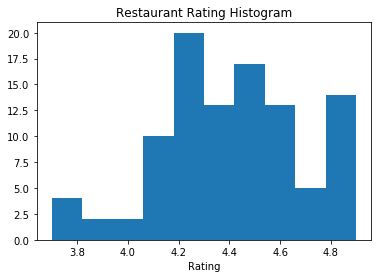

In [11]:
#plotting the histogram for the rating of restaurants
import numpy as np
import matplotlib.pyplot as mlp
%matplotlib inline

restaurant_df['Restaurant Rating'] = pd.to_numeric(restaurant_df['Restaurant Rating'])
restaurant_df['Restaurant Latitude'] = pd.to_numeric(restaurant_df['Restaurant Latitude'])
restaurant_df['Restaurant Longitude'] = pd.to_numeric(restaurant_df['Restaurant Longitude'])
mlp.hist(restaurant_df['Restaurant Rating'])
mlp.xlabel('Rating')
mlp.title('Restaurant Rating Histogram')

### Plotting the restaurants on Chennai's map

In [9]:
import folium

In [22]:
chennai = [sum(restaurant_df['Restaurant Latitude'])/len(restaurant_df['Restaurant Latitude']), sum(restaurant_df['Restaurant Longitude'])/len(restaurant_df['Restaurant Longitude'])]
chennai_map = folium.Map(location = chennai, zoom_start = 12)

for lat, lng, name in zip(restaurant_df['Restaurant Latitude'], restaurant_df['Restaurant Longitude'], restaurant_df['Restaurant Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        parse_html = False).add_to(chennai_map)

chennai_map
    

### clustering the restaurants based on rating

In [44]:
from sklearn.cluster import KMeans

#creating clusters of rating
kmeans = KMeans(n_clusters=3).fit(restaurant_df.drop(['Restaurant Name', 'Restaurant Longitude', 'Restaurant Latitude'], axis = 1))

#adding the labels to existing dataframe
restaurant_df['Cluster Labels'] = kmeans.labels_

In [45]:
#restaurant_df = restaurant_df.drop(['Cluster Labels', 'Cluster Label'], axis = 1)
restaurant_df.head()

,Restaurant Name,Restaurant Rating,Restaurant Latitude,Restaurant Longitude,Cluster Labels
0,The Black Pearl,4.6,12.901449,80.226841,1
1,Coal Barbecues,4.8,12.851848,80.226183,0
2,Coal Barbecues,4.9,13.046905,80.236914,0
3,Coal Barbecues,4.9,12.986037,80.218186,0
4,Onesta,4.7,12.874895,80.227239,0


In [46]:
#importing cm and colors
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=chennai, zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurant_df['Restaurant Latitude'], restaurant_df['Restaurant Longitude'], restaurant_df['Restaurant Name'], restaurant_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion<a name = 'results'></a>

Most of the restaurants in chennai belong to cluster 1 and they are centered around the area Teynampet. So this could be the place to try and visit if one wants the best of culinary experience.

## Conclusion <a name = 'conclusion'></a>

In conclusion we could say that Chennai has quite a lot restaurants. Most of them are centtered around Teynampet which has the highest concetration of hihgest rated restaurants.